## Cilia classifier tests
This notebook will be used for testing the classifier on the dataset it was trained and on other datasets.

In [1]:
import matplotlib.pyplot as plt
from morphocilia.io import load_rescaled_channel
from morphocilia.quantifier import cilia_props_table
from morphocilia.segmenter import cilia_segmenter_cleaner
from morphocilia.classifier import scaler_classifier
import napari
import numpy as np
import pandas as pd
import joblib
from skimage.measure import regionprops_table
from skimage.io import imread

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


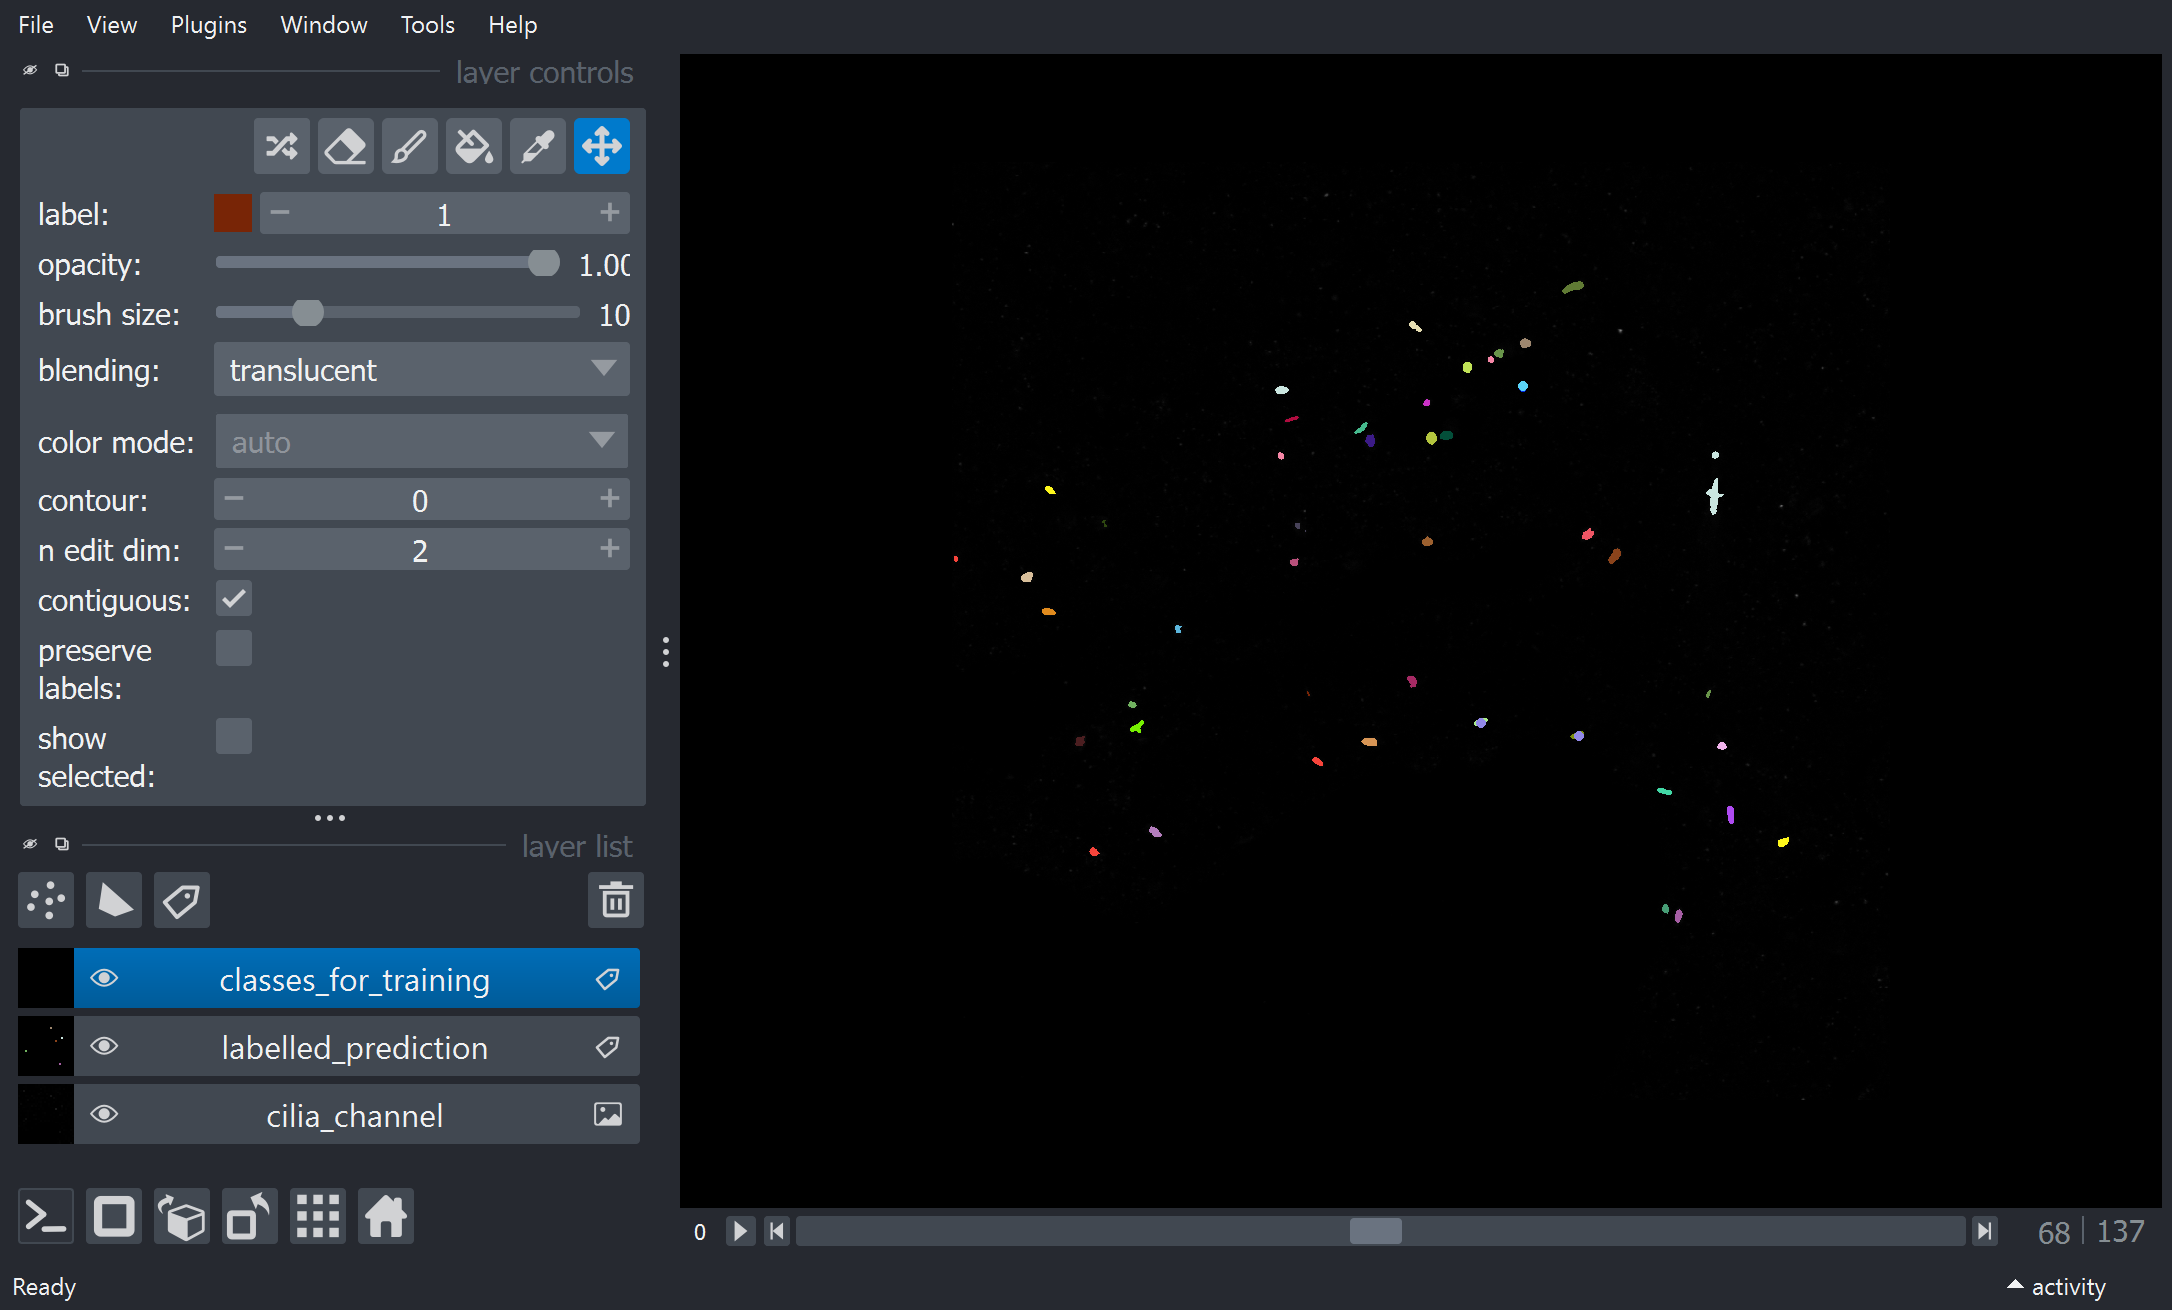

In [2]:
cilia_channel = load_rescaled_channel(
    "../data/20231025_p1_cd13_opn_arl13b.lif", 5, 1
)
classes_for_training = imread("D:/estela/src/classes_for_training.tif")

labelled_prediction = cilia_segmenter_cleaner(cilia_channel)

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
viewer.add_labels(classes_for_training, opacity=1)
napari.utils.nbscreenshot(viewer)

In [3]:
df = cilia_props_table(labelled_prediction, cilia_channel)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity
0,1,716.0,18.318122,8.472275,174.0,0.895000
1,2,832.0,21.063707,8.052221,126.0,0.873033
2,3,746.0,17.776380,8.147164,133.0,0.857471
3,4,581.0,22.434952,6.870506,125.0,0.728984
4,5,456.0,20.219087,4.116744,67.0,0.885437
...,...,...,...,...,...,...
414,415,892.0,21.464908,8.126919,105.0,0.891109
415,416,487.0,14.374873,7.878321,146.0,0.915414
416,417,705.0,19.705175,7.833316,190.0,0.860806
417,418,917.0,21.883075,8.749751,171.0,0.885135


In [4]:
def parse_classes(class_number):
    if class_number == 1:
        return "elongated"
    elif class_number == 2:
        return "looped"
    elif class_number == 3:
        return "fibroblastic"
    elif class_number == 0:
        return "NA"
    else:
        raise ValueError

In [5]:
props = regionprops_table(
    labelled_prediction,
    classes_for_training,
    properties=["label", "intensity_max"],
)
data_classes = pd.DataFrame(props).rename(columns={"intensity_max": "classes"})
data_classes["classes"] = data_classes["classes"].apply(parse_classes)
data_classes

,label,classes
0,1,NA
1,2,NA
2,3,NA
3,4,NA
4,5,NA
...,...,...
414,415,NA
415,416,NA
416,417,NA
417,418,NA


In [6]:
complete_dataset = df.merge(right=data_classes, on="label")
complete_dataset

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,classes
0,1,716.0,18.318122,8.472275,174.0,0.895000,NA
1,2,832.0,21.063707,8.052221,126.0,0.873033,NA
2,3,746.0,17.776380,8.147164,133.0,0.857471,NA
3,4,581.0,22.434952,6.870506,125.0,0.728984,NA
4,5,456.0,20.219087,4.116744,67.0,0.885437,NA
...,...,...,...,...,...,...,...
414,415,892.0,21.464908,8.126919,105.0,0.891109,NA
415,416,487.0,14.374873,7.878321,146.0,0.915414,NA
416,417,705.0,19.705175,7.833316,190.0,0.860806,NA
417,418,917.0,21.883075,8.749751,171.0,0.885135,NA


In [66]:
classification = scaler_classifier(complete_dataset)
classification

D:\estela\libs\morphocilia\morphocilia\classifier.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
D:\estela\libs\morphocilia\morphocilia\classifier.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
D:\estela\libs\morphocilia\morphocilia\classifier.py:22: SettingWithCopy

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted
0,0.895000,8.472275,0.402314,-0.465590,fibroblastic
1,0.873033,8.052221,0.276212,-0.598404,fibroblastic
2,0.857471,8.147164,0.186884,-0.568385,fibroblastic
3,0.728984,6.870506,-0.550686,-0.972043,elongated
4,0.885437,4.116744,0.347418,-1.842736,fibroblastic
...,...,...,...,...,...
414,0.891109,8.126919,0.379977,-0.574786,fibroblastic
415,0.915414,7.878321,0.519495,-0.653389,fibroblastic
416,0.860806,7.833316,0.206026,-0.667618,fibroblastic
417,0.885135,8.749751,0.345685,-0.377857,fibroblastic


In [67]:
def get_color(kind):
    if kind == "elongated":
        return 1
    elif kind == "fibroblastic":
        return 2
    elif kind == "looped":
        return 3
    else:
        return 4

In [68]:
classification["classes"] = classification.predicted.apply(get_color)
classification

C:\Users\Lab\AppData\Local\Temp\ipykernel_3568\1555392767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification ["classes"] = classification.predicted.apply(get_color)


,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes
0,0.895000,8.472275,0.402314,-0.465590,fibroblastic,2
1,0.873033,8.052221,0.276212,-0.598404,fibroblastic,2
2,0.857471,8.147164,0.186884,-0.568385,fibroblastic,2
3,0.728984,6.870506,-0.550686,-0.972043,elongated,1
4,0.885437,4.116744,0.347418,-1.842736,fibroblastic,2
...,...,...,...,...,...,...
414,0.891109,8.126919,0.379977,-0.574786,fibroblastic,2
415,0.915414,7.878321,0.519495,-0.653389,fibroblastic,2
416,0.860806,7.833316,0.206026,-0.667618,fibroblastic,2
417,0.885135,8.749751,0.345685,-0.377857,fibroblastic,2


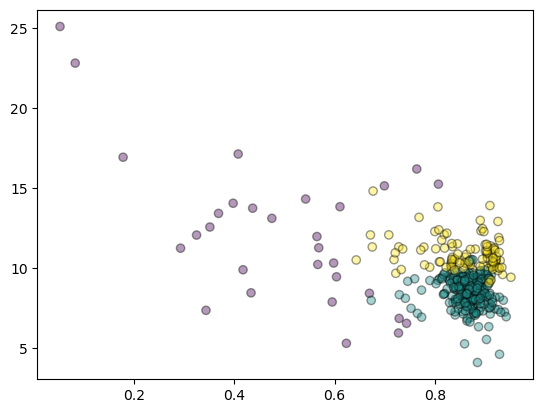

In [52]:
scatter = plt.scatter(
    classification["solidity"],
    classification["axis_minor_length"],
    c=classification["classes"],
    edgecolors="k",
    alpha=0.4,
)

To visualise the classification in the cilia image, Napari will be used.

In [69]:
solidity_check = classification.query("0.6< solidity < 0.8")
solidity_check

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes
3,0.728984,6.870506,-0.550686,-0.972043,elongated,1
5,0.752781,7.501895,-0.414079,-0.772408,fibroblastic,2
10,0.790093,10.073627,-0.199895,0.040731,looped,3
63,0.623644,5.314098,-1.155377,-1.464153,elongated,1
78,0.728274,11.344657,-0.554759,0.442609,looped,3
87,0.669658,8.438549,-0.891240,-0.476254,elongated,1
107,0.768739,13.187022,-0.322477,1.025134,looped,3
162,0.778448,11.328192,-0.266744,0.437403,looped,3
201,0.741497,8.128484,-0.478857,-0.574291,fibroblastic,2
206,0.736090,11.211674,-0.509892,0.400562,looped,3


In [71]:
classification.to_csv("cilia_classification.csv", index=False)

In [72]:
solidity_check.to_csv("solidity_check.csv", index=False)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Table clicked, set label 1
Table clicked, set label 3
Selected column solidity
Selected column solidity
Selected column classes
Selected column label
Table clicked, set label 35
